# Explore module relationships

There are some accessory-accessory modules that we'd like to explore how they are related. To do this, we will plot a heatmap to show how the genes in accessory module A and accessory module B are related.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from core_acc_modules import utils, paths

np.random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Clustering method
method_name = "affinity"

# Gene subset
gene_subset = "acc"

# Select 2 modules
select_modules = [10, 14]

### Load correlation matrix

In [3]:
# Load correlation matrix
pao1_corr_filename = paths.PAO1_CORR_LOG_SPELL_ACC

In [4]:
pao1_corr = pd.read_csv(pao1_corr_filename, sep="\t", index_col=0, header=0)

### Load module membership

In [5]:
pao1_membership_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pao1_modules_{method_name}_{gene_subset}.tsv"
)

In [6]:
pao1_membership = pd.read_csv(pao1_membership_filename, sep="\t", header=0, index_col=0)

In [7]:
select_modules_df = pao1_membership[
    (pao1_membership["module id"] == 10) | (pao1_membership["module id"] == 14)
]

In [8]:
select_modules_df.head()

,module id
PA1391,14
PA1392,14
PA1383,14
PA3149,10
PA1384,14


### Heatmap

In [9]:
select_gene_ids = list(select_modules_df.index)

In [10]:
select_corr = pao1_corr.loc[select_gene_ids, select_gene_ids]

In [11]:
select_corr.head()

,PA1391,PA1392,PA1383,PA3149,PA1384,PA3142,PA3152,PA3155,PA1385,PA1387,...,PA3157,PA1389,PA1388,PA3144,PA3158,PA3153,PA3154,PA3150,PA3151,PA1390
PA1391,1.000000,0.882776,0.865370,0.022093,0.852300,0.138750,0.022285,0.038710,0.792444,0.871081,...,0.026683,0.915025,0.869623,0.036933,0.027002,-0.015934,-0.006431,0.017399,0.024865,0.934072
PA1392,0.882776,1.000000,0.896086,-0.039358,0.835685,0.075537,0.036617,0.004659,0.837034,0.876906,...,-0.003886,0.898369,0.894502,0.009740,-0.030281,-0.023682,-0.021826,-0.026621,0.053973,0.905858
PA1383,0.865370,0.896086,1.000000,-0.063316,0.823890,0.105188,-0.054077,0.022850,0.839533,0.954703,...,-0.008767,0.885412,0.837432,-0.077828,-0.015070,-0.079183,-0.056163,-0.023073,-0.024693,0.848927
PA3149,0.022093,-0.039358,-0.063316,1.000000,-0.035083,0.581133,0.827370,0.890989,-0.057787,-0.052387,...,0.825039,-0.029381,-0.050006,0.676089,0.850003,0.897539,0.896317,0.955550,0.880536,-0.047513
PA1384,0.852300,0.835685,0.823890,-0.035083,1.000000,0.013077,0.017974,-0.056051,0.872874,0.848739,...,-0.054007,0.869728,0.862596,0.013509,-0.060975,-0.050524,-0.048769,-0.035530,-0.021637,0.858659


In [12]:
# Make color labels for module id
my_palette = dict(zip(select_modules_df["module id"].unique(), ["red", "blue"]))
row_colors = select_modules_df["module id"].map(my_palette)

In [14]:
my_palette

{14: 'red', 10: 'blue'}

CPU times: user 642 ms, sys: 243 ms, total: 886 ms
Wall time: 319 ms


Text(0.5, 1.05, 'Correlation of modules [10, 14]')

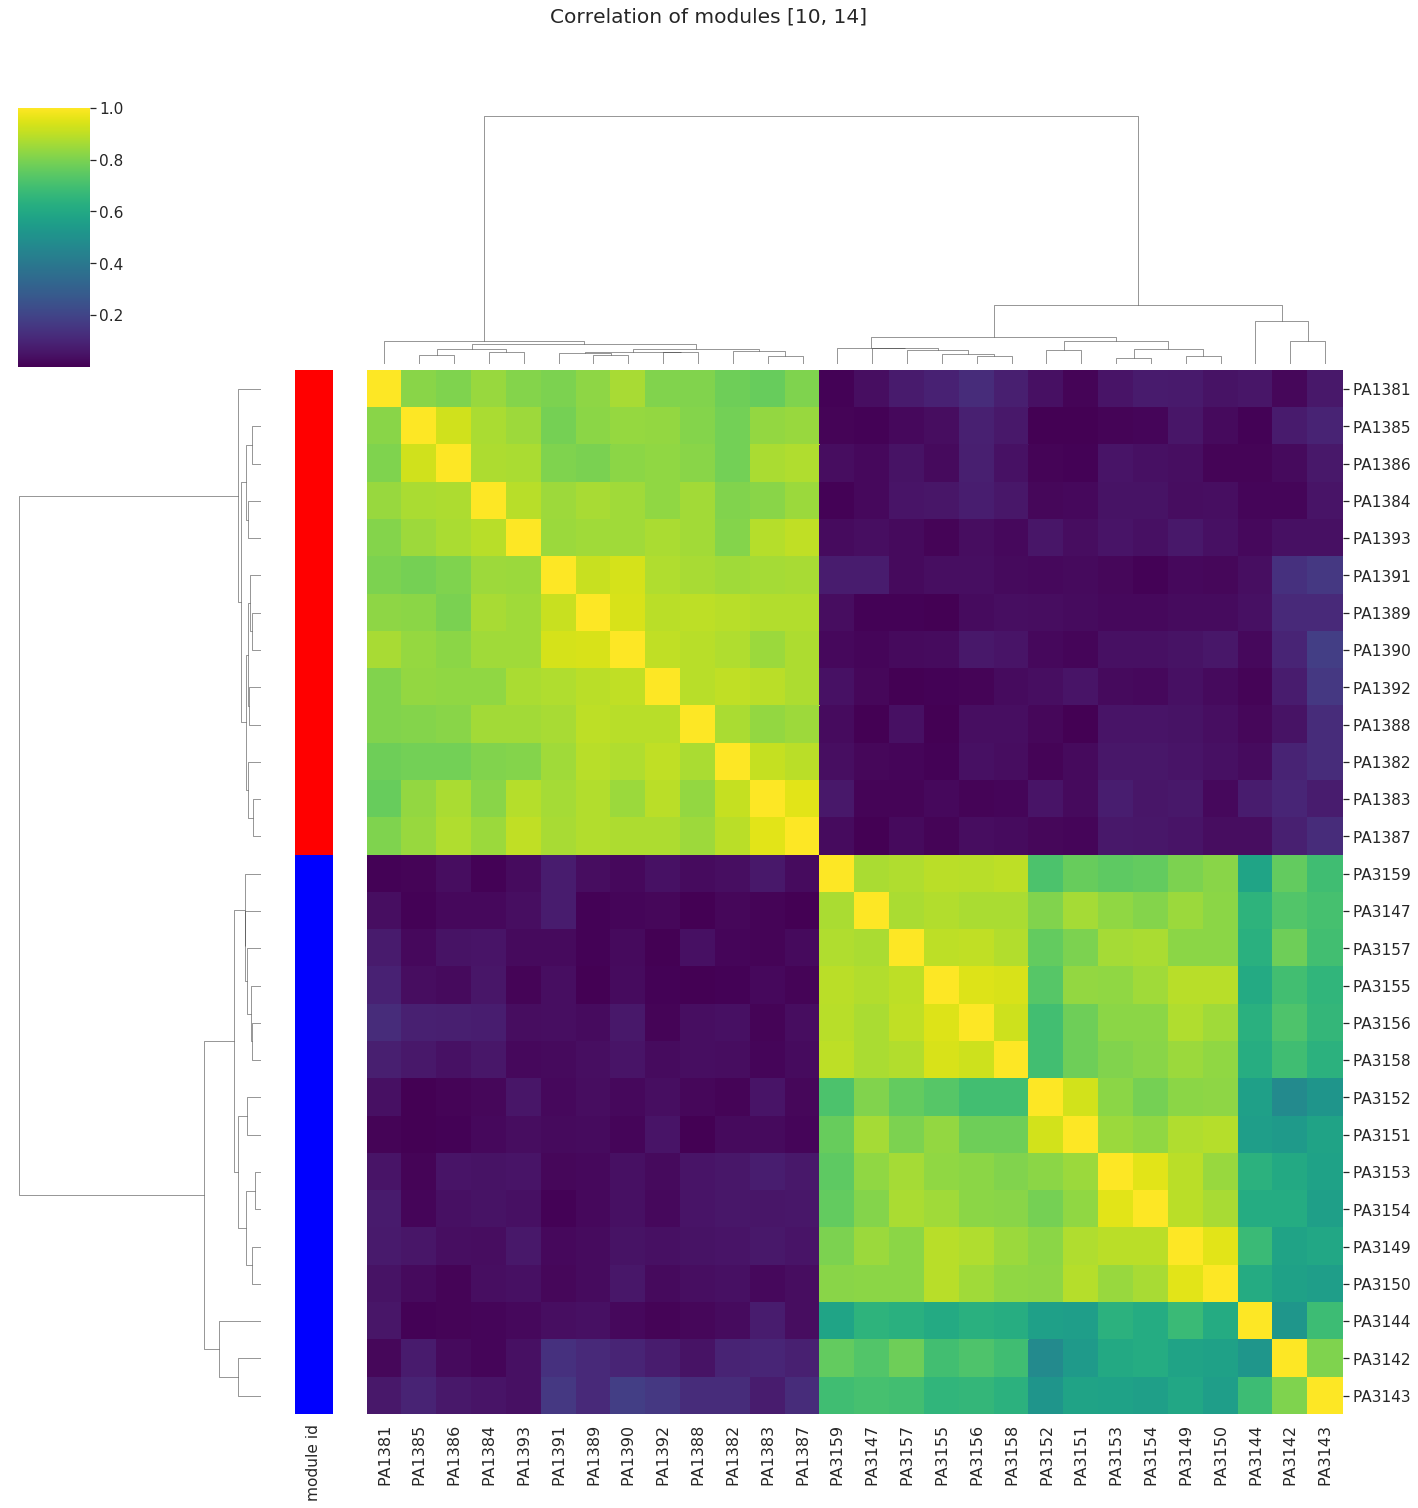

In [19]:
%%time
f = sns.clustermap(
    select_corr.abs(), row_colors=row_colors, cmap="viridis", figsize=(20, 20)
)
f.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xmajorticklabels(), fontsize=16)
f.fig.suptitle(f"Correlation of modules {select_modules}", y=1.05)

These two accessory modules were of interest to our collaborators. She was interested in how they were related. To get at this, I plotted the heatmap of the correlation matrix, subsetting only for those gene ids that belong to these two modules of interest.

Based on this heatmap, the genes within each module are more closely co-expressed with each other, as expected. There doesn't look to be cross over between the modules.